In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys, os, glob
root_dir = '/home/gddaslab/mxp140/tcr_project_ultimate'
sys.path.append(root_dir)

import h5py
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare, chi2
from constants import patient_names
from pdf import pdf, ci_pdf

In [3]:
asterisk = '\u2217'
p_value_stars = {0.001: f'{asterisk}{asterisk}{asterisk}', 0.01: f'{asterisk}{asterisk}', 0.05: f'{asterisk}'}
def get_asterisks(p_value):
    for threshold in sorted(p_value_stars.keys()):
        if p_value < threshold:
            return p_value_stars[threshold]
    return 'ns'

In [4]:
def count_clone_sizes(arr, min_size=1, max_size=10):
    # Count frequencies for sizes 2 through 9
    counts = [np.sum(arr == i) for i in range(min_size, max_size)]
    # Add count of size max_size or greater
    counts.append(np.sum(arr >= max_size))
    return counts

In [40]:
p_value_df = pd.DataFrame(columns=['patient', 'type', 'p_value'])
chi_squared_values = []
coverages = []
differences = []
for patient_id in patient_names[:]:
    region_number_logic = range(1, 4) if patient_id not in ['BrMET008', 'GBM032'] else range(1, 5)
    for region_number in region_number_logic[:]: 
        # print(patient_id, region_number)
        try:
            with h5py.File(f'/home/gddaslab/mxp140/tcr_project_ultimate/results/{patient_id}_region{region_number}_model_results_from_panpep.h5', 'r') as f:
                data_config = f['data_config'][:]
                model_config = f['model_config'][:]
                print(len(data_config))   
            min_size = 1
            max_size = 10
            # data_config = model_config[:, 500]
            f_obs = count_clone_sizes(data_config, min_size=min_size, max_size=max_size)
            f_exp = np.mean(np.array([count_clone_sizes(model_config[:, j], min_size=min_size, max_size=max_size) for j in range(model_config.shape[1])]), axis=0)
            
            print(f'f_obs:{f_obs[0]}, f_exp:{f_exp[0]}')
            differences.append(np.abs((f_obs[0]-f_exp[0])/f_obs[0]))
            if f_obs[0]<f_exp[0]:
                print('f_obs<f_exp')
            elif f_obs[0]>f_exp[0]:
                print('f_obs>f_exp')
            else:
                print('f_obs=f_exp')
            chi2_stat = np.sum([(obs-exp)**2/exp for obs, exp in zip(f_obs, f_exp)])
            chi_squared_values.append(chi2_stat)
            dof = len(f_obs) -1
            # print(dof)
            # print(dof if dof!=1 else pass)
            p_value = 1 - chi2.cdf(chi2_stat, dof)
            new_row = pd.Series({'patient':f'{patient_id}-region{region_number}', 'type':'BrMET' if 'BrMET' in patient_id else 'GBM', 'p_value': p_value})
            p_value_df = pd.concat([p_value_df, new_row.to_frame().T], ignore_index=True)
            print(p_value)
            
            # #################### coverage probability #######################
            # data_points = pdf(data_config)
            # ci_df = ci_pdf(model_config, alpha=5, least_number_of_observations=10)
            # count_within_band = 0
            # for x, y in zip(data_points[0], data_points[1]):
            #     look_at = ci_df[(ci_df['clone_size']==x) & ci_df[ci_df['clone_size']!=1]]
            #     if look_at.empty:
            #         continue
            #     lower_bound = look_at['lower'].values[0]
            #     upper_bound = look_at['upper'].values[0]
            #     if (lower_bound<=y) & (y<=upper_bound):
            #         count_within_band += 1
            # coverage_probability = count_within_band/len(data_points[0])
            # print(f'{patient_id}-region{region_number}: {coverage_probability*100:.0f}%')
            # coverages.append(coverage_probability)
        except:
            print(f"File not found for {patient_id}-region{region_number}")
            pass

654
f_obs:487, f_exp:469.136
f_obs>f_exp
0.7191537149118432
196
f_obs:153, f_exp:148.129
f_obs>f_exp
0.3902273121335138
39
f_obs:33, f_exp:33.426
f_obs<f_exp
0.9947155534406735
89
f_obs:72, f_exp:69.849
f_obs>f_exp
0.4584787387427546
10730
f_obs:8160, f_exp:7296.193
f_obs>f_exp
0.0
9441
f_obs:7025, f_exp:6387.183
f_obs>f_exp
0.0
7545
f_obs:5600, f_exp:4971.783
f_obs>f_exp
0.0
5687
f_obs:4768, f_exp:4560.459
f_obs>f_exp
0.0
9575
f_obs:7454, f_exp:7215.451
f_obs>f_exp
8.832791195345635e-06
2478
f_obs:2123, f_exp:1957.677
f_obs>f_exp
0.0
8490
f_obs:6140, f_exp:5673.399
f_obs>f_exp
0.0
602
f_obs:492, f_exp:474.145
f_obs>f_exp
0.5436495321119208
3557
f_obs:2771, f_exp:2594.21
f_obs>f_exp
6.183942247162122e-13
1562
f_obs:1339, f_exp:1189.005
f_obs>f_exp
0.0
1945
f_obs:1465, f_exp:1328.416
f_obs>f_exp
5.163691696452588e-11
778
f_obs:661, f_exp:598.32
f_obs>f_exp
8.881784197001252e-16
4114
f_obs:3558, f_exp:3315.102
f_obs>f_exp
0.0
921
f_obs:779, f_exp:735.389
f_obs>f_exp
2.868428237090548e-05

In [21]:
chi_squared_values

[np.float64(6.2058356839873285),
 np.float64(9.525697081817768),
 np.float64(1.760353063457793),
 np.float64(8.7730854164361),
 np.float64(446.90443531729613),
 np.float64(263.615429095191),
 np.float64(316.3028094696257),
 np.float64(107.70495322520546),
 np.float64(39.638888125256244),
 np.float64(154.3318483039199),
 np.float64(172.3448673094236),
 np.float64(7.90596797282433),
 np.float64(77.06113203162026),
 np.float64(156.75353285719697),
 np.float64(67.28961969312735),
 np.float64(91.19457309332199),
 np.float64(210.18801283504234),
 np.float64(36.79036787969352),
 np.float64(67.03799965903428),
 np.float64(155.7738816939713),
 np.float64(85.34127448867788),
 np.float64(84.13483481725184),
 np.float64(23.98815550753409),
 np.float64(80.18696047442407),
 np.float64(17.308492290095554),
 np.float64(156.18476708661746),
 np.float64(101.15108679531832),
 np.float64(55.767737729901114),
 np.float64(265.1236015325925),
 np.float64(161.12009928611752),
 np.float64(496.85649249448045),


In [22]:
min(chi_squared_values)

np.float64(1.760353063457793)

In [23]:
max(chi_squared_values)

np.float64(496.85649249448045)

In [29]:
(17<=np.array(chi_squared_values)) & (np.array(chi_squared_values)<=20)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [24]:
np.array(chi_squared_values)<=20

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
        True])

In [25]:
chi_squared_values[24]

np.float64(17.308492290095554)

In [23]:
np.mean(differences)

np.float64(0.061980292640976334)

In [11]:
f_exp

array([469.136, 100.128,  36.158,  17.135,   9.553,   5.65 ,   3.657,
         2.495,   1.858,   8.23 ])

In [66]:
np.sort(coverages)

array([0.30769231, 0.5       , 0.51851852, 0.5483871 , 0.55172414,
       0.58333333, 0.6       , 0.6       , 0.60606061, 0.62068966,
       0.63636364, 0.65      , 0.66666667, 0.68421053, 0.6875    ,
       0.69230769, 0.69642857, 0.6969697 , 0.7       , 0.7       ,
       0.70588235, 0.71428571, 0.71428571, 0.72527473, 0.72727273,
       0.73469388, 0.73913043, 0.74193548, 0.74285714, 0.75      ,
       0.75      , 0.76190476, 0.77647059, 0.78378378, 0.79487179,
       0.80392157, 0.80597015, 0.81081081, 0.81355932, 0.8372093 ,
       0.8630137 , 0.875     , 0.88888889, 0.88888889, 0.88888889,
       0.90909091, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [63]:
chi2_stat = np.sum([(obs-exp)**2/exp for obs, exp in zip(f_obs, f_exp)])
dof = len(f_obs) -1
from scipy.stats import chi2
p_value = 1 - chi2.cdf(chi2_stat, dof)
print(chi2_stat, dof, p_value)

13.425153881731077 9 0.1442930810063554


In [62]:
# Normalize f_exp to have the same sum as f_obs
f_exp_normalized = np.array(f_exp) * (sum(f_obs) / sum(f_exp))
chi2_result = chisquare(f_obs=f_obs, f_exp=f_exp_normalized, ddof=0)
print(chi2_result)

Power_divergenceResult(statistic=np.float64(13.425153881731081), pvalue=np.float64(0.14429308100635505))


In [17]:
p_value_df

,patient,type,p_value
0,BrMET008-region1,BrMET,0.719154
1,BrMET008-region2,BrMET,0.390227
2,BrMET008-region3,BrMET,0.994716
3,BrMET008-region4,BrMET,0.458479
4,BrMET009-region1,BrMET,0.0
5,BrMET009-region2,BrMET,0.0
6,BrMET009-region3,BrMET,0.0
7,BrMET010-region1,BrMET,0.0
8,BrMET010-region2,BrMET,0.000009
9,BrMET010-region3,BrMET,0.0


In [10]:
(p_value_df['p_value']>=0.05).sum()

np.int64(12)

In [9]:
(p_value_df['p_value']<0.05).sum()

np.int64(43)

In [72]:
p_value_df['star'] = [get_asterisks(p_value) for p_value in p_value_df['p_value'].values]
p_value_df

,patient,type,p_value,star
0,BrMET008-region1,BrMET,0.721757,ns
1,BrMET008-region2,BrMET,0.607482,ns
2,BrMET008-region3,BrMET,0.991208,ns
3,BrMET008-region4,BrMET,0.823164,ns
4,BrMET009-region1,BrMET,0.34077,ns
5,BrMET009-region2,BrMET,0.414923,ns
6,BrMET009-region3,BrMET,0.867707,ns
7,BrMET010-region1,BrMET,0.290036,ns
8,BrMET010-region2,BrMET,0.497866,ns
9,BrMET010-region3,BrMET,0.088001,ns


In [51]:
print(p_value_df['p_value'].min(), p_value_df['p_value'].max())

0.0004831509688839608 0.9985035603572682


In [53]:
p_value_df['p_value'].values

array([np.float64(0.7217567851292845), np.float64(0.6074815600969135),
       np.float64(0.9912080494511709), np.float64(0.8231637963337798),
       np.float64(0.34077014447101917), np.float64(0.4149228509074211),
       np.float64(0.8677072808525366), np.float64(0.2900361231780595),
       np.float64(0.49786573332811523), np.float64(0.08800084421190502),
       np.float64(0.3472668773594656), np.float64(0.36607925133881336),
       np.float64(0.29859261338531107), np.float64(0.9316958624754029),
       np.float64(0.38561007298144934), np.float64(0.9093473480487274),
       np.float64(0.07225876471834569), np.float64(0.5701217310084501),
       np.float64(0.0004831509688839608), np.float64(0.9118809842098833),
       np.float64(0.6049000648530944), np.float64(0.8336243814878849),
       np.float64(0.9705066935962259), np.float64(0.27593623611921503),
       np.float64(0.5619969534889726), np.float64(0.36415079409324924),
       np.float64(0.6393301505198241), np.float64(0.9290691513302

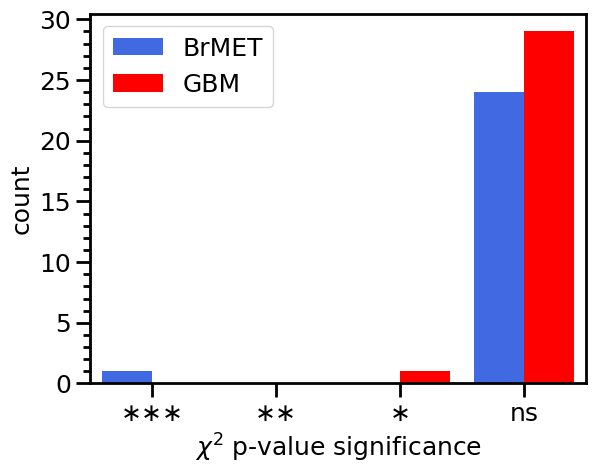

In [73]:
import matplotlib.ticker as ticker
ax = sns.countplot(data=p_value_df, x='star', hue='type', 
                   palette={'BrMET':'royalblue', 'GBM':'red'}, 
                   order=[f'{asterisk}{asterisk}{asterisk}', f'{asterisk}{asterisk}', f'{asterisk}', 'ns'],
                   saturation=1)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.grid(False)
ax.set_xlabel(r'$\chi^2$ p-value significance', fontsize=18)
ax.set_ylabel('count', fontsize=18)
for label in ax.get_xticklabels():
    label.set_fontsize(18)
for label in ax.get_yticklabels():
    label.set_fontsize(18)

ax.tick_params(
    axis="x", which="major", direction="out", length=10, width=2, labelsize=18
)
ax.tick_params(
    axis="x", which="minor", direction="out", length=5, width=2, labelsize=18
)
ax.tick_params(
    axis="y", which="major", direction="out", length=10, width=2, labelsize=18
)
ax.tick_params(
    axis="y", which="minor", direction="out", length=5, width=2, labelsize=18
)
ax.legend(title='', fontsize=18)
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.show()

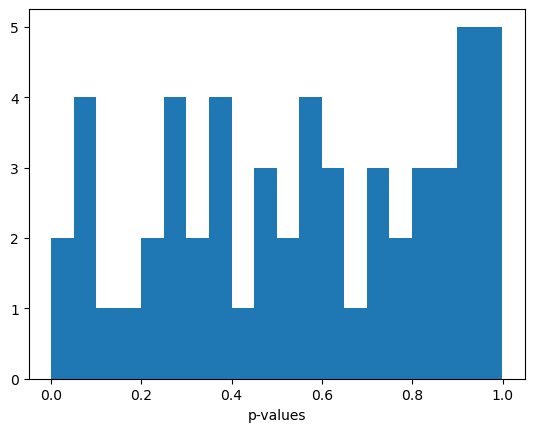

In [81]:
plt.hist(p_value_df['p_value'].values, bins=20)
plt.xlabel('p-values')
plt.show()

In [121]:
p_value_df = pd.DataFrame(columns=['patient', 'type', 'p_value'])
chi_squared_values = []
coverages = []
for patient_id in patient_names[:1]:
    region_number_logic = range(1, 4) if patient_id not in ['BrMET008', 'GBM032'] else range(1, 5)
    for region_number in region_number_logic[:1]:
        # print(patient_id, region_number)
        try:
            with h5py.File(f'/home/gddaslab/mxp140/tcr_project_ultimate/results/{patient_id}_region{region_number}_model_results_from_panpep.h5', 'r') as f:
                data_config = f['data_config'][:]
                model_config = f['model_config'][:]
            data_points = pdf(data_config)
            ci_df = ci_pdf(model_config, alpha=5, least_number_of_observations=10)
            ci_df = ci_df[(ci_df['lower']!=ci_df['median']) &  (ci_df['median']!=ci_df['upper'])]
            count_within_band = 0
            for x, y in zip(data_points[0], data_points[1]):
                look_at = ci_df[ci_df['clone_size']==x]
                if look_at.empty:
                    # print(f'clone {x} not found in {patient_id}-region{region_number}')
                    continue
                lower_bound = look_at['lower'].values[0]
                upper_bound = look_at['upper'].values[0]
                if (lower_bound<=y) & (y<=upper_bound):
                    count_within_band += 1
            coverage_probability = count_within_band/np.sum(data_points[0]<=ci_df['clone_size'].max())
            print(f'{patient_id}-region{region_number}: {coverage_probability*100:.0f}%')
            coverages.append(coverage_probability)
        except:
            # print(f"File not found for {patient_id}-region{region_number}")
            continue
print(f'Mean coverage per data: {np.mean(coverages)}')

BrMET008-region1: 100%
Mean coverage per data: 1.0


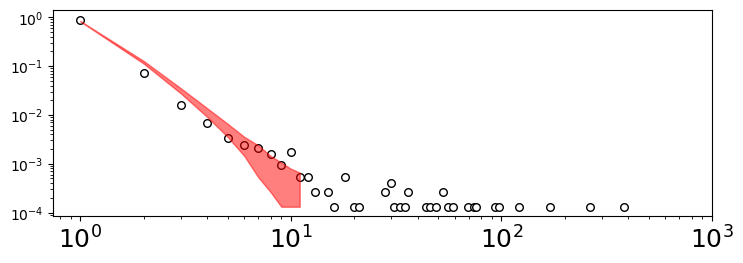

In [74]:
patient_id = 'GBM052'
region_number = 2
ncols = 1
fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(8.5, 2.67), gridspec_kw={'wspace':0.09, 'hspace':0.15})
with h5py.File(f'/home/gddaslab/mxp140/tcr_project_ultimate/results/{patient_id}_region{region_number}_model_results_from_panpep.h5', 'r') as f:
    # data_config = f['data_config'][:]
    # model_config = f['model_config'][:]
    # data_points = pdf(data_config)
    # ci_df = ci_pdf(model_config, alpha=5, least_number_of_observations=10)
    # ci_df = ci_df[(ci_df['lower']!=ci_df['median']) &  (ci_df['median']!=ci_df['upper'])]
    # count_within_band = 0
    # for x, y in zip(data_points[0], data_points[1]):
    #     look_at = ci_df[ci_df['clone_size']==x]
    #     if look_at.empty:
    #         # print(f'clone {x} not found in {patient_id}-region{region_number}')
    #         continue
    #     lower_bound = look_at['lower'].values[0]
    #     upper_bound = look_at['upper'].values[0]
    #     if (lower_bound<=y) & (y<=upper_bound):
    #         count_within_band += 1
    # coverage_probability = count_within_band/np.sum(data_points[0]<=ci_df['clone_size'].max())
    # print(f'{patient_id}-region{region_number}: {coverage_probability*100:.0f}%')
    data_config = f['data_config'][:]
    data_config = np.unique(data_config, return_counts=True)
    x_data, y_data = data_config[0], data_config[1] / np.sum(data_config[1])
                    
    model_config = f['model_config'][:]
    least_number_of_observations = 10
    ci_df = ci_pdf(model_config, least_number_of_observations=least_number_of_observations)
    ci_df = ci_df[(ci_df['lower']!=ci_df['median']) &  (ci_df['median']!=ci_df['upper'])]
                    
    facecolors = 'white'#'royalblue' if 'BrMET' in patient_id else 'red'
    edgecolors = 'black'#darkblue' if 'BrMET' in patient_id else 'darkred'
    ax.scatter(x_data, y_data, s=30, facecolors=facecolors, alpha=1.0, edgecolors=edgecolors, zorder=1, label='data')
    ax.fill_between(ci_df['clone_size'], ci_df['lower'], ci_df['upper'], color='royalblue' if 'BrMET' in patient_id else 'red', zorder=2, alpha=0.5, label=f'model-panpep')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xticks([1, 10, 100, 1000])  # 10^0, 10^1, 10^2, 10^3
    ax.set_xticklabels(['$10^0$', '$10^1$', '$10^2$', '$10^3$'], fontsize=18)
    offset_x = 0.30

    # ax.set_xlim(min(x_data) - offset_x * min(x_data), max(x_data) + offset_x * max(x_data))
    # ax.set_ylim(min(y_data) - offset_y * min(y_data), max(y_data) + offset_y * max(y_data))
    # ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(2, 10)))

    # ax.set_xlabel(r"Clone size", fontsize=18)
    # ax.set_ylabel('Probability' if i==0 else '', fontsize=18)
    
    # ax.tick_params(
    #     axis="x", which="major", direction="out", length=8, width=1.5, labelsize=14
    # )
    # ax.tick_params(
    #     axis="x", which="minor", direction="out", length=5, width=1.5, labelsize=14
    # )
    # ax.tick_params(
    #     axis="y", which="major", direction="out", length=10, width=1.5, labelsize=14
    # )
    # ax.tick_params(
    #     axis="y", which="minor", direction="out", length=5, width=1.5, labelsize=14
    # )
    
    # for spine in ax.spines.values():
    #     spine.set_linewidth(2)
    
    # ax.legend(loc='upper right', fontsize=10)
    # ax.set_title(f'{patient_id}-region{region_number}', fontsize=14)
    plt.show()

(770,) (770, 1000)
(7582,) (7582, 1000)
(6522,) (6522, 1000)
(14874, 1000)
(14874,)


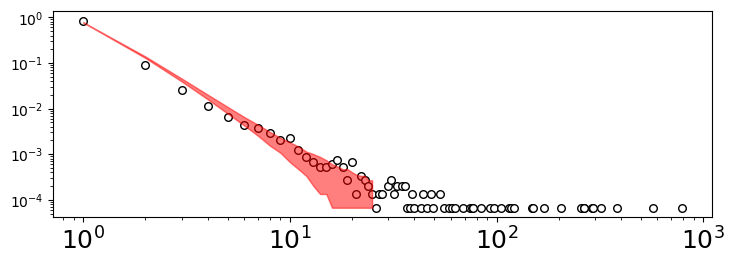

GBM052: 64%


In [126]:
patient_id = 'GBM052'
synthetic_config = []
data_config_combined = []
for region_number in [1, 2, 3]:
    with h5py.File(f'/home/gddaslab/mxp140/tcr_project_ultimate/results/{patient_id}_region{region_number}_model_results_from_panpep.h5', 'r') as f:
        data_config = f['data_config'][:]
        model_config = f['model_config'][:]
        data_config_combined.append(data_config)
        synthetic_config.append(model_config)
        print(data_config.shape, model_config.shape)

final_synthetic_config = np.concatenate(synthetic_config, axis=0)
print(final_synthetic_config.shape)

final_data_config = np.concatenate(data_config_combined)
print(final_data_config.shape)


ncols = 1
fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(8.5, 2.67), gridspec_kw={'wspace':0.09, 'hspace':0.15})
final_data_config_pdf = pdf(final_data_config)
x_data, y_data = final_data_config_pdf[0], final_data_config_pdf[1] / np.sum(final_data_config_pdf[1])
                    
# model_config = f['model_config'][:]
least_number_of_observations = 10
ci_df = ci_pdf(final_synthetic_config, least_number_of_observations=least_number_of_observations)
ci_df = ci_df[(ci_df['lower']!=ci_df['median']) &  (ci_df['median']!=ci_df['upper'])]
                
facecolors = 'white'#'royalblue' if 'BrMET' in patient_id else 'red'
edgecolors = 'black'#darkblue' if 'BrMET' in patient_id else 'darkred'
ax.scatter(x_data, y_data, s=30, facecolors=facecolors, alpha=1.0, edgecolors=edgecolors, zorder=1, label='data')
ax.fill_between(ci_df['clone_size'], ci_df['lower'], ci_df['upper'], color='royalblue' if 'BrMET' in patient_id else 'red', zorder=2, alpha=0.5, label=f'model-panpep')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([1, 10, 100, 1000])  # 10^0, 10^1, 10^2, 10^3
ax.set_xticklabels(['$10^0$', '$10^1$', '$10^2$', '$10^3$'], fontsize=18)
offset_x = 0.30
plt.show()

data_points = final_data_config_pdf
count_within_band = 0
for x, y in zip(data_points[0], data_points[1]):
    look_at = ci_df[ci_df['clone_size']==x]
    if look_at.empty:
        # print(f'clone {x} not found in {patient_id}-region{region_number}')
        continue
    lower_bound = look_at['lower'].values[0]
    upper_bound = look_at['upper'].values[0]
    if (lower_bound<=y) & (y<=upper_bound):
        count_within_band += 1
coverage_probability = count_within_band/np.sum(data_points[0]<=ci_df['clone_size'].max())
print(f'{patient_id}: {coverage_probability*100:.0f}%')

In [133]:
f_obs = count_clone_sizes(final_data_config, min_size=1, max_size=10)
f_exp = np.mean(np.array([count_clone_sizes(final_synthetic_config[:, j], min_size=1, max_size=10) for j in range(final_synthetic_config.shape[1])]), axis=0)
chi2_stat = np.sum([(obs-exp)**2/exp for obs, exp in zip(f_obs, f_exp)])
dof = len(f_obs) -1
print(dof, chi2_stat)
p_value = 1 - chi2.cdf(chi2_stat, dof)
print(p_value)


9 533.3918362887504
0.0


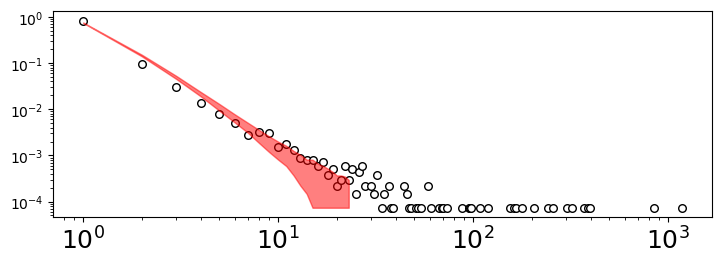

GBM052: 43%
9 703.4924549875036
0.0


In [146]:
from pdf import generate_configuration_per_tcr
with h5py.File(f'/home/gddaslab/mxp140/tcr_project_ultimate/results/probabilities/PANPEP/probs_GBM052.h5', 'r') as f:
    probs_gbm052 = f['result'][:]
    config_single_x2 = generate_configuration_per_tcr(probs_gbm052, min_clone_size=1, max_clone_size=probs_gbm052.shape[1]+1, sample_size=1000, disable_progressbar=False)
combined_data = pd.read_csv('/home/gddaslab/mxp140/tcr_project_ultimate/data/BrMET_and_GBM_data-PANPEP.csv')
combined_data = combined_data[combined_data['Patient']=='GBM052']

ncols = 1
fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(8.5, 2.67), gridspec_kw={'wspace':0.09, 'hspace':0.15})
data_config_pdf = pdf(combined_data['counts'].values)
x_data, y_data = data_config_pdf[0], data_config_pdf[1] / np.sum(data_config_pdf[1])
                    
# model_config = f['model_config'][:]
least_number_of_observations = 10
ci_df = ci_pdf(config_single_x2, least_number_of_observations=least_number_of_observations)
ci_df = ci_df[(ci_df['lower']!=ci_df['median']) &  (ci_df['median']!=ci_df['upper'])]
                
facecolors = 'white'#'royalblue' if 'BrMET' in patient_id else 'red'
edgecolors = 'black'#darkblue' if 'BrMET' in patient_id else 'darkred'
ax.scatter(x_data, y_data, s=30, facecolors=facecolors, alpha=1.0, edgecolors=edgecolors, zorder=1, label='data')
ax.fill_between(ci_df['clone_size'], ci_df['lower'], ci_df['upper'], color='royalblue' if 'BrMET' in patient_id else 'red', zorder=2, alpha=0.5, label=f'model-panpep')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([1, 10, 100, 1000])  # 10^0, 10^1, 10^2, 10^3
ax.set_xticklabels(['$10^0$', '$10^1$', '$10^2$', '$10^3$'], fontsize=18)
offset_x = 0.30
plt.show()

data_points = data_config_pdf
count_within_band = 0
for x, y in zip(data_points[0], data_points[1]):
    look_at = ci_df[ci_df['clone_size']==x]
    if look_at.empty:
        # print(f'clone {x} not found in {patient_id}-region{region_number}')
        continue
    lower_bound = look_at['lower'].values[0]
    upper_bound = look_at['upper'].values[0]
    if (lower_bound<=y) & (y<=upper_bound):
        count_within_band += 1
coverage_probability = count_within_band/np.sum(data_points[0]<=ci_df['clone_size'].max())
print(f'{patient_id}: {coverage_probability*100:.0f}%')

f_obs = count_clone_sizes(combined_data['counts'].values, min_size=1, max_size=10)
f_exp = np.mean(np.array([count_clone_sizes(config_single_x2[:, j], min_size=1, max_size=10) for j in range(config_single_x2.shape[1])]), axis=0)
chi2_stat = np.sum([(obs-exp)**2/exp for obs, exp in zip(f_obs, f_exp)])
dof = len(f_obs) -1
print(dof, chi2_stat)
p_value = 1 - chi2.cdf(chi2_stat, dof)
print(p_value)


In [12]:
p_value_df = pd.DataFrame(columns=['patient', 'type', 'p_value'])
chi_squared_values = []
coverages = []
for patient_id in patient_names[:]:
    region_number_logic = range(1, 4) if patient_id not in ['BrMET008', 'GBM032'] else range(1, 5)
    for region_number in region_number_logic[:]:
        # print(patient_id, region_number)
        try:
            with h5py.File(f'/home/gddaslab/mxp140/tcr_project_ultimate/results/{patient_id}_region{region_number}_model_results_from_panpep.h5', 'r') as f:
                data_config = f['data_config'][:]
                model_config = f['model_config'][:]
            data_points = pdf(data_config)
            has_values_between5and10 = np.any((data_points[0] >= 5) & (data_points[0] <= 100))
            if has_values_between5and10 & (len(data_points[0]>=5)>20):
                ci_df = ci_pdf(model_config, alpha=5, least_number_of_observations=10)
                ci_df = ci_df[(ci_df['lower']!=ci_df['median']) &  (ci_df['median']!=ci_df['upper'])]
                count_within_band = 0
                for x, y in zip(data_points[0], data_points[1]):
                    if x <= 5:
                        # print('Avoiding 1')
                        continue
                    else:
                        # print(x)
                        look_at = ci_df[ci_df['clone_size']==x]
                        if look_at.empty:
                            # print(f'clone {x} not found in {patient_id}-region{region_number}')
                            continue
                        lower_bound = look_at['lower'].values[0]
                        upper_bound = look_at['upper'].values[0]
                        if (lower_bound<=y) & (y<=upper_bound):
                            count_within_band += 1
                coverage_probability = count_within_band/np.sum((data_points[0]<=ci_df['clone_size'].max()) & (data_points[0]!=1))
                print(f'{patient_id}-region{region_number}: {coverage_probability*100:.0f}%')
                coverages.append(coverage_probability)
        except:
            # print(f"File not found for {patient_id}-region{region_number}")
            continue
print(f'Mean coverage per data: {np.mean(coverages)}')

BrMET009-region1: 66%
BrMET009-region2: 76%
BrMET009-region3: 77%
BrMET010-region1: 64%
BrMET010-region2: 80%
BrMET010-region3: 50%
BrMET018-region1: 82%
BrMET018-region3: 75%
BrMET019-region1: 60%
BrMET019-region2: 76%
BrMET019-region3: 33%
BrMET025-region1: 50%
BrMET027-region1: 73%
BrMET027-region2: 75%
BrMET027-region3: 79%
GBM032-region1: 57%
GBM032-region4: 67%
GBM052-region2: 40%
GBM052-region3: 71%
GBM055-region2: 56%
GBM056-region2: 44%
GBM059-region2: 80%
GBM059-region3: 62%
GBM070-region2: 69%
GBM074-region3: 56%
Mean coverage per data: 0.6470312532324917


In [7]:
data_points

(array([ 1,  2,  3,  4,  6,  8, 10]),
 array([0.80898876, 0.12359551, 0.02247191, 0.01123596, 0.01123596,
        0.01123596, 0.01123596]))

In [ ]:


print("Has values between 5 and 10:", has_values)

Has values between 5 and 10: False


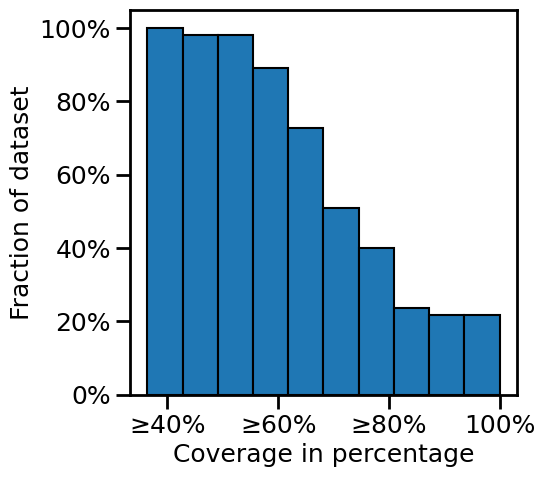

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.hist(np.array(coverages)*100, bins=10, cumulative=-1, histtype='bar', edgecolor='black', linewidth=1.5, align='mid', density=True, rwidth=5, alpha=1.0)
ax.set_xticks([40, 60, 80, 100], ['≥40%', '≥60%', '≥80%', '100%'])
current_yticks = plt.gca().get_yticks()
plt.yticks(current_yticks, [f'{x*100:.0f}%' for x in current_yticks])

ax.set_ylim(top=1.05)
ax.set_xlabel('Coverage in percentage', fontsize=18)
ax.set_ylabel('Fraction of dataset', fontsize=18)

xtick_labels, ytick_labels = ax.get_xticklabels(), ax.get_yticklabels()
for label in xtick_labels + ytick_labels:
    label.set_fontsize(24)

ax.tick_params(
    axis="x", which="major", direction="out", length=10, width=2, labelsize=18
)
ax.tick_params(
    axis="x", which="minor", direction="in", length=5, width=2, labelsize=18
)
ax.tick_params(
    axis="y", which="major", direction="out", length=10, width=2, labelsize=18
)
ax.tick_params(
    axis="y", which="minor", direction="in", length=5, width=2, labelsize=18
)

for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.show()

In [57]:
(np.sum(np.array(coverages) >=0.70)/len(coverages))*100

np.float64(50.90909090909091)

In [36]:
test_array = data_points
test_array

(array([ 1,  2,  3,  4,  5,  6,  7, 11, 89]),
 array([0.83426966, 0.10674157, 0.02247191, 0.00842697, 0.00842697,
        0.00842697, 0.00280899, 0.00561798, 0.00280899]))

In [37]:
for xx, yy in zip(test_array[0], test_array[1]):
    look_at = ci_df[ci_df['clone_size']==xx]
    # print(look_at)
    if look_at.empty:
        # print(f'clone {x} not found in {patient_id}-region{region_number}')
        continue
    lower_bound = look_at['lower'].values[0]
    upper_bound = look_at['upper'].values[0]
    if (lower_bound<=yy) & (yy<=upper_bound):
        print(f'{xx}: {yy}: True')
    else:
        print(f'{xx}: {yy}: False')

1: 0.8342696629213483: True
2: 0.10674157303370786: True
3: 0.02247191011235955: True
4: 0.008426966292134831: True
5: 0.008426966292134831: True
6: 0.008426966292134831: True


# Trying Bill's Suggestion

In [5]:
from constants import max_kr_panpep

In [6]:
import warnings
import numpy as np
from numba import jit
from scipy.integrate import quad
from scipy.optimize import minimize
from concurrent.futures import ProcessPoolExecutor

# Suppress only IntegrationWarning
warnings.filterwarnings("ignore")


@jit(nopython=True)
def integrand(tau, x1, x2, kr, m, M):
    p = np.exp(-x2 * kr * (x1 - tau))
    integrand_value = np.exp(tau) * p * ((1 - p) ** (M - m))
    return integrand_value


def probability(x1, x2, kr, m, M, contamination_factor=0.0):
    factor_up_front = (1.0 / (np.exp(x1) - 1)) * (1.0/(1.0+contamination_factor))
    integral, _ = quad(
        integrand,
        0,
        x1,
        args=(x1, x2, kr, m, M),
        limit=200,
        epsabs=1e-10,
        epsrel=1e-10,
    )
    if M == 1:
        return (factor_up_front * integral) + contamination_factor
    else:
        return factor_up_front * integral


probability = np.vectorize(probability)


def neg_likelihood(
    params,
    initial_clone_count_values,
    final_clone_count_values,
    scaled_kr_values,
    contamination_factor,    
    verbose=False,
):

    x1, x2 = params[0], params[1]
    n = len(final_clone_count_values)
    x1_values = np.full(n, x1)
    x2_values = np.full(n, x2)
    contamination_factor_values = np.full(n, contamination_factor)
    probs = probability(
        x1_values,
        x2_values,
        scaled_kr_values,
        initial_clone_count_values,
        final_clone_count_values,
        contamination_factor_values,
    )
    # Replace zero values with the smallest positive value allowed in Python
    smallest_positive_value = np.finfo(float).eps
    probabilities = np.where(probs == 0, smallest_positive_value, probs)
    sum_log_probs = np.sum(np.log(probabilities))
    neg_sum = -sum_log_probs

    if verbose:
        print(f"Neg-logL: {neg_sum:.8f}")
        print(f"x1: {x1:.8f}")
        print(f"x2: {x2:.8f}")
        print(f"=" * 80)
    return neg_sum


def new_neg_likelihood(
    params,
    fixed_x1,
    initial_clone_count_values,
    final_clone_count_values,
    scaled_kr_values,
    contamination_factor,
    verbose=False,
):
    x2 = params[0]  # params is now a 1D array with just x2
    x1 = fixed_x1
    n = len(final_clone_count_values)
    x1_values = np.full(n, x1)
    x2_values = np.full(n, x2)
    contamination_factor_values = np.full(n, contamination_factor)
    probs = probability(
        x1_values,
        x2_values,
        scaled_kr_values,
        initial_clone_count_values,
        final_clone_count_values,
        contamination_factor_values,
    )
    # Replace zero values with the smallest positive value allowed in Python
    smallest_positive_value = np.finfo(float).eps
    probabilities = np.where(probs == 0, smallest_positive_value, probs)
    sum_log_probs = np.sum(np.log(probabilities))
    neg_sum = -sum_log_probs

    if verbose:
        print(f"Neg-logL: {neg_sum:.8f}")
        print(f"x2: {x2:.8f}")
        print(f"=" * 80)
    return neg_sum


def run_optimization_for_both_params(
    initial_clone_count_values,
    final_clone_count_values,
    scaled_kr_values,
    fixed_x1,
    contamination_factor,
    bounds=(
        (1e-10, 100),
        (1e-10, 100),
    ),
    initial_guess=[5, 5],
    verbose=False,
):
    initial_guess = initial_guess
    result = minimize(
        neg_likelihood,
        initial_guess,
        args=(
            initial_clone_count_values,
            final_clone_count_values,
            scaled_kr_values,
            contamination_factor,
            verbose,
        ),
        method="Nelder-Mead",
        bounds=bounds,
    )
    x1, x2 = result.x[0], result.x[1]
    return x1, x2, initial_guess, result.fun


def run_optimization_for_fixed_x1(
    initial_clone_count_values,
    final_clone_count_values,
    scaled_kr_values,
    fixed_x1,
    contamination_factor,
    bounds=((1e-10, 100),),
    initial_guess=[5],
    verbose=False,
):
    # Modified to take fixed_x1 parameter and only optimize x2
    bounds = [bounds[0]]  # Only bounds for x2
    initial_guess = initial_guess
    result = minimize(
        new_neg_likelihood,
        initial_guess,
        args=(
            fixed_x1,
            initial_clone_count_values,
            final_clone_count_values,
            scaled_kr_values,
            contamination_factor,
            verbose,
        ),
        method="Nelder-Mead",
        bounds=bounds,
    )
    x2 = result.x[0]
    return fixed_x1, x2, initial_guess[0], result.fun


root_dir = "/home/gddaslab/mxp140/tcr_project_ultimate"
sys.path.append(root_dir)

# Suppress only IntegrationWarning
warnings.filterwarnings("ignore")


def calc_probs_for_single_tcr(kr, x1, x2, m, maxM, contamination_factor):
    return [probability(x1, x2, kr, m, M, contamination_factor) for M in range(m, maxM + 1)]


def calc_probs_for_every_tcr(kr, x1, x2, m, maxM, contamination_factor, disable_progressbar=False):
    if isinstance(kr, np.ndarray) and kr.ndim == 1:
        with ProcessPoolExecutor() as executor:
            # Submit all tasks and get futures
            futures = [
                executor.submit(calc_probs_for_single_tcr, k, x1, x2, m, maxM, contamination_factor)
                for k in kr
            ]
            # Use tqdm to track completion of futures
            results = list(
                tqdm.tqdm(
                    (future.result() for future in futures),
                    total=len(kr),
                    desc="Processing TCRs",
                    disable=disable_progressbar,
                )
            )
        return np.array(results)
    else:
        raise ValueError("kr must be 1D array or a 1D list.")


def generate_configuration_per_tcr(
    prob_array,
    min_clone_size=1,
    max_clone_size=None,
    sample_size=1,
    disable_progressbar=False,
):
    if prob_array.ndim == 1:
        assert max_clone_size == min_clone_size + len(
            prob_array
        ), f"max_clone_size ({max_clone_size}) must equal min_clone_size ({min_clone_size}) + len(prob_array) ({len(prob_array)})"
        config_per_tcr = np.random.choice(
            range(min_clone_size, len(prob_array) + min_clone_size),
            size=sample_size,
            replace=True,
            p=prob_array / sum(prob_array),
        )
        return config_per_tcr
    elif prob_array.ndim == 2:  # Ensure we only handle 1D and 2D arrays
        assert (
            max_clone_size == min_clone_size + prob_array.shape[1]
        ), f"max_clone_size ({max_clone_size}) must equal min_clone_size ({min_clone_size}) + prob_array.shape[1] ({prob_array.shape[1]})"

        all_configs = np.empty((prob_array.shape[0], sample_size))
        for i in tqdm.tqdm(
            range(prob_array.shape[0]),
            total=prob_array.shape[0],
            desc="Generating configuration for each TCR",
            leave=False,
            disable=disable_progressbar,
        ):
            # config_per_tcr = generate_configuration_per_tcr(prob_array[i, :], size)
            config_per_tcr = np.random.choice(
                range(min_clone_size, prob_array.shape[1] + min_clone_size),
                size=sample_size,
                replace=True,
                p=prob_array[i, :] / sum(prob_array[i, :]),
            )
            all_configs[i, :] = config_per_tcr
        return all_configs
    else:
        raise ValueError("Input array must be either 1D or 2D.")

In [7]:
result = []
region_range_dict = {'BrMET008':range(4), 'GBM032':range(4)}
percent_to_remove_values = (np.arange(0, 35, 1)/100)
for patient_id in patient_names[:]:
    if 'BrMET' in patient_id:
        for region in region_range_dict.get(patient_id, range(3)):
            region_number = region+1
            # patient_id = 'BrMET019'
            # region_number = 1
            filename = f"{root_dir}/data/glioblastoma_data/PANPEP/{patient_id}/{patient_id}_region{region_number}.csv"
            df = pd.read_csv(filename, sep=',')
            ones_df = df[df['counts'] == 1]
            rest_df = df[df['counts'] != 1]

            squared_differences = []
            # fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 2))
            with h5py.File(f'/home/gddaslab/mxp140/tcr_project_ultimate/results/{patient_id}_region{region_number}_model_results_from_panpep.h5', 'r') as f:
                data_config = f['data_config'][:]
                model_config = f['model_config'][:]
                probabilities = f['probabilities'][:]
                min_clone_size_to_consider = 1
                max_clone_size_to_consider = 10
                f_exp = np.mean(np.array([count_clone_sizes(model_config[:, j], min_size=min_clone_size_to_consider, max_size=max_clone_size_to_consider) for j in range(model_config.shape[1])]), axis=0)
                for percent_to_remove in tqdm.tqdm(percent_to_remove_values, leave=False):
                    n_to_remove = round(ones_df.shape[0] * percent_to_remove)
                    # Randomly select rows to keep
                    ones_df_kept = ones_df.sample(n=ones_df.shape[0] - n_to_remove, random_state=42)
                    # Combine back with the rest of the data
                    df = pd.concat([rest_df, ones_df_kept])
                    # print(df.shape)
                    final_clone_count_values = df['counts'].values
                    initial_clone_size = 1
                        
                    f_obs = count_clone_sizes(final_clone_count_values, min_size=min_clone_size_to_consider, max_size=max_clone_size_to_consider)
                    
                    differences = np.sum([(obs-exp)**2 for obs, exp in zip(f_obs, f_exp)])
                    squared_differences.append(differences)
            
            # ax.plot(range(1, len(squared_differences)+1), squared_differences, '-o', color='blue')
            # ax.set_xlabel(f'Iteration')
            # ax.set_ylabel(r'$|f_{exp}-f_{obs}|^2$')
            # ax.set_title(f'{patient_id}-region{region_number}')
            # plt.tight_layout()
            # plt.show()
            
            result.append(pd.DataFrame({'patient':f'{patient_id}-region{region_number}', 'removed':percent_to_remove_values, 'differences':squared_differences}))

In [8]:
avg_removal_percent = np.mean([result[j].loc[result[j]['differences'].idxmin()]['removed'] for j in range(len(result))])
print(avg_removal_percent)

0.0608


In [20]:
patient_id = "BrMET019"
region_number = 1
filename = f"{root_dir}/data/glioblastoma_data/PANPEP/{patient_id}/{patient_id}_region{region_number}.csv"
df = pd.read_csv(filename, sep=",")
ones_df = df[df["counts"] == 1]
rest_df = df[df["counts"] != 1]
percent_to_remove = 0.07  # avg_removal_percent
n_to_remove = round(ones_df.shape[0] * percent_to_remove)
# print(ones_df.shape[0])
# print(n_to_remove)

# Randomly select rows to keep
ones_df_kept = ones_df.sample(n=ones_df.shape[0] - n_to_remove, random_state=42)

# Combine back with the rest of the data
df = pd.concat([rest_df, ones_df_kept])
print(df.shape)
# final_clone_count_values = df["counts"].values
# initial_clone_size = 1
# initial_clone_count_values = np.full(len(final_clone_count_values), initial_clone_size)
# scaled_kr_values = df["kr"].values / max_kr_panpep
# x1 = 100
# verbose = False
# _, x2, _, _ = run_optimization_for_fixed_x1(
#     initial_clone_count_values=initial_clone_count_values,
#     final_clone_count_values=final_clone_count_values,
#     scaled_kr_values=scaled_kr_values,
#     fixed_x1=x1,
#     verbose=verbose,
# )
# print(x2)
# probabilities = calc_probs_for_every_tcr(
#     kr=scaled_kr_values, x1=x1, x2=x2, m=initial_clone_size, maxM=10000
# )
# probabilities[:, 0] = probabilities[:, 0] + percent_to_remove
# model_config = generate_configuration_per_tcr(
#     probabilities,
#     min_clone_size=initial_clone_size,
#     max_clone_size=probabilities.shape[1] + initial_clone_size,
#     sample_size=5000,
#     disable_progressbar=True
# )
# min_clone_size_to_consider = 1
# max_clone_size_to_consider = 10
# f_obs = count_clone_sizes(
#     final_clone_count_values,
#     min_size=min_clone_size_to_consider,
#     max_size=max_clone_size_to_consider,
# )
# f_exp = np.mean(
#     np.array(
#         [
#             count_clone_sizes(
#                 model_config[:, j],
#                 min_size=min_clone_size_to_consider,
#                 max_size=max_clone_size_to_consider,
#             )
#             for j in range(model_config.shape[1])
#         ]
#     ),
#     axis=0,
# )
# chi2_stat = np.sum([(obs - exp) ** 2 / exp for obs, exp in zip(f_obs, f_exp)])
# # print(chi2_stat)
# dof = len(f_obs) - 1
# p_value = 1 - chi2.cdf(chi2_stat, dof)
# if p_value <= 0.05:
#     print(f"{patient_id}-region{region_number}: {p_value:.3f} with {dof} dof rejects NULL. No good fit.")
# else:
#     print(f"{patient_id}-region{region_number}: {p_value:.3f} with {dof} dof accepts NULL. Good fit.")

0.58306884765625


Processing TCRs: 100%|██████████| 1468/1468 [02:47<00:00,  8.76it/s]


124.12433570893828
0.000 with 9 dof rejects NULL. No good fit.


In [29]:
region_range_dict = {"BrMET008": range(4), "GBM032": range(4)}
for patient_id in tqdm.tqdm(patient_names[:], leave=True):
    if "BrMET" in patient_id:
        for region in region_range_dict.get(patient_id, range(3)):
            region_number = region + 1
            # patient_id = "BrMET019"
            # region_number = 1
            filename = f"{root_dir}/data/glioblastoma_data/PANPEP/{patient_id}/{patient_id}_region{region_number}.csv"
            df = pd.read_csv(filename, sep=",")
            # ones_df = df[df["counts"] == 1]
            # rest_df = df[df["counts"] != 1]
            percent_to_remove = avg_removal_percent
            # n_to_remove = round(ones_df.shape[0] * percent_to_remove)
            # # print(ones_df.shape[0])
            # # print(n_to_remove)

            # # Randomly select rows to keep
            # ones_df_kept = ones_df.sample(n=ones_df.shape[0] - n_to_remove, random_state=42)

            # # Combine back with the rest of the data
            # df = pd.concat([rest_df, ones_df_kept])
            # print(df.shape)
            if df.shape[0] < 3000:
                final_clone_count_values = df["counts"].values
                initial_clone_size = 1
                initial_clone_count_values = np.full(
                    len(final_clone_count_values), initial_clone_size
                )
                scaled_kr_values = df["kr"].values / max_kr_panpep
                x1 = 100
                verbose = False
                _, x2, _, _ = run_optimization_for_fixed_x1(
                    initial_clone_count_values=initial_clone_count_values,
                    final_clone_count_values=final_clone_count_values,
                    scaled_kr_values=scaled_kr_values,
                    fixed_x1=x1,
                    contamination_factor=percent_to_remove,
                    verbose=verbose,
                )
                print(f"{patient_id}-region{region_number}: x2={x2}")
                if np.max(final_clone_count_values) <=500:
                    max_M_value = 1000
                elif np.max(final_clone_count_values) > 2000:
                    max_M_value = 10000
                else:
                    max_M_value = 5000
                probabilities = calc_probs_for_every_tcr(
                    kr=scaled_kr_values,
                    x1=x1,
                    x2=x2,
                    m=initial_clone_size,
                    maxM=max_M_value,
                    contamination_factor=percent_to_remove,
                    disable_progressbar=False,
                )
                # probabilities[:, 0] = probabilities[:, 0] + percent_to_remove
                model_config = generate_configuration_per_tcr(
                    probabilities,
                    min_clone_size=initial_clone_size,
                    max_clone_size=probabilities.shape[1] + initial_clone_size,
                    sample_size=1000,
                    disable_progressbar=False,
                )
                min_clone_size_to_consider = 1
                max_clone_size_to_consider = 10
                f_obs = count_clone_sizes(
                    final_clone_count_values,
                    min_size=min_clone_size_to_consider,
                    max_size=max_clone_size_to_consider,
                )
                f_exp = np.mean(
                    np.array(
                        [
                            count_clone_sizes(
                                model_config[:, j],
                                min_size=min_clone_size_to_consider,
                                max_size=max_clone_size_to_consider,
                            )
                            for j in range(model_config.shape[1])
                        ]
                    ),
                    axis=0,
                )
                chi2_stat = np.sum(
                    [(obs - exp) ** 2 / exp for obs, exp in zip(f_obs, f_exp)]
                )
                # print(chi2_stat)
                dof = len(f_obs) - 1
                p_value = 1 - chi2.cdf(chi2_stat, dof)
                if p_value <= 0.05:
                    print(
                        f"{patient_id}-region{region_number}: {p_value:.3f} with {dof} dof rejects NULL. No good fit."
                    )
                else:
                    print(
                        f"{patient_id}-region{region_number}: {p_value:.3f} with {dof} dof accepts NULL. Good fit."
                    )

  0%|          | 0/19 [00:00<?, ?it/s]

BrMET008-region1: x2=3.23577880859375


Processing TCRs: 100%|██████████| 654/654 [02:04<00:00,  5.26it/s]


BrMET008-region1: 0.832 with 9 dof accepts NULL. Good fit.
BrMET008-region2: x2=2.4503173828125


Processing TCRs: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s]


BrMET008-region2: 0.483 with 9 dof accepts NULL. Good fit.
BrMET008-region3: x2=1.2991943359375


Processing TCRs: 100%|██████████| 39/39 [00:06<00:00,  5.84it/s]


BrMET008-region3: 0.995 with 9 dof accepts NULL. Good fit.
BrMET008-region4: x2=2.00140380859375


  5%|▌         | 1/19 [03:13<57:55, 193.06s/it]

BrMET008-region4: 0.560 with 9 dof accepts NULL. Good fit.
BrMET010-region3: x2=2.42083740234375


 16%|█▌        | 3/19 [10:53<58:47, 220.49s/it]

BrMET010-region3: 0.000 with 9 dof rejects NULL. No good fit.
BrMET018-region2: x2=4.2437744140625


 21%|██        | 4/19 [12:45<45:43, 182.93s/it]

BrMET018-region2: 0.666 with 9 dof accepts NULL. Good fit.
BrMET019-region1: x2=0.58758544921875


Processing TCRs: 100%|██████████| 1562/1562 [04:48<00:00,  5.41it/s]


BrMET019-region1: 0.000 with 9 dof rejects NULL. No good fit.
BrMET019-region2: x2=0.861328125


Processing TCRs: 100%|██████████| 1945/1945 [06:16<00:00,  5.17it/s]


BrMET019-region2: 0.000 with 9 dof rejects NULL. No good fit.
BrMET019-region3: x2=0.5687255859375


 26%|██▋       | 5/19 [26:34<1:32:32, 396.61s/it]

BrMET019-region3: 0.000 with 9 dof rejects NULL. No good fit.
BrMET025-region2: x2=1.16644287109375


Processing TCRs: 100%|██████████| 921/921 [02:44<00:00,  5.58it/s]


BrMET025-region2: 0.000 with 9 dof rejects NULL. No good fit.
BrMET025-region3: x2=0.6473388671875


 32%|███▏      | 6/19 [31:22<1:18:24, 361.90s/it]

BrMET025-region3: 0.000 with 9 dof rejects NULL. No good fit.
BrMET027-region2: x2=8.06011962890625


Processing TCRs: 100%|██████████| 1734/1734 [05:38<00:00,  5.12it/s]


BrMET027-region2: 0.000 with 9 dof rejects NULL. No good fit.
BrMET027-region3: x2=7.69146728515625


 37%|███▋      | 7/19 [46:39<1:47:17, 536.49s/it]

BrMET027-region3: 0.000 with 9 dof rejects NULL. No good fit.
BrMET028-region1: x2=0.76165771484375


Processing TCRs: 100%|██████████| 465/465 [01:18<00:00,  5.94it/s]


BrMET028-region1: 0.017 with 9 dof rejects NULL. No good fit.
BrMET028-region2: x2=1.3245849609375


Processing TCRs: 100%|██████████| 676/676 [01:59<00:00,  5.65it/s]


BrMET028-region2: 0.000 with 9 dof rejects NULL. No good fit.
BrMET028-region3: x2=0.63037109375


100%|██████████| 19/19 [51:39<00:00, 163.13s/it] 


BrMET028-region3: 0.201 with 9 dof accepts NULL. Good fit.


In [28]:
p_value

np.float64(0.1715142888738681)

In [30]:
((17-13)/17)*100

23.52941176470588

Processing TCRs: 100%|██████████| 1562/1562 [00:49<00:00, 31.25it/s]
1it [01:01, 61.44s/it]

0.000 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 1496/1496 [00:46<00:00, 32.25it/s]
2it [01:58, 58.57s/it]

0.000 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 1429/1429 [00:44<00:00, 31.93it/s]
3it [02:51, 56.28s/it]

0.000 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 1362/1362 [00:42<00:00, 31.73it/s]
4it [03:44, 54.85s/it]

0.000 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 1295/1295 [00:40<00:00, 31.71it/s]
5it [04:34, 53.15s/it]

0.000 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 1228/1228 [00:39<00:00, 30.86it/s]
6it [05:22, 53.70s/it]

0.000 rejects NULL. No good fit.


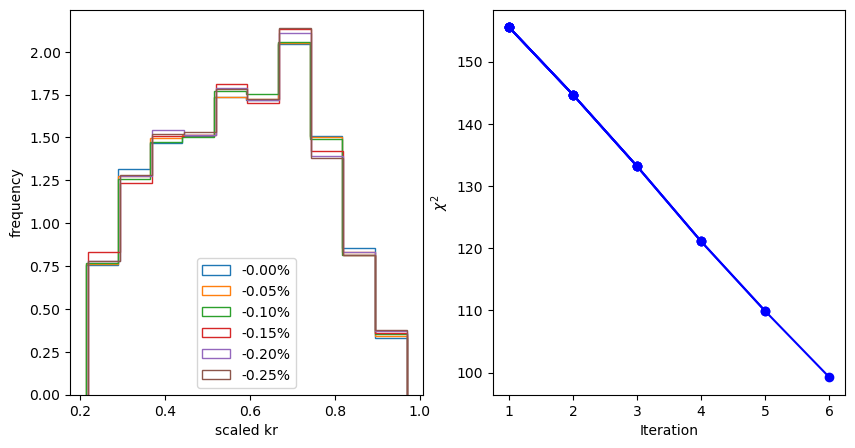

In [9]:
patient_id = 'BrMET019'
region_number = 1
filename = f"{root_dir}/data/glioblastoma_data/PANPEP/{patient_id}/{patient_id}_region{region_number}.csv"
df = pd.read_csv(filename, sep=',')
df = df[df['counts']>=1]
ones_df = df[df['counts'] == 1]
rest_df = df[df['counts'] != 1]

x2s = []
chi_squares = []
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1, ax2 = axes
for i, j in tqdm.tqdm(enumerate(np.arange(0, 30, 5)/100)):
    n_to_remove = int(ones_df.shape[0]*j)
    # print(ones_df.shape[0])
    # print(n_to_remove)

    # Randomly select rows to keep
    ones_df_kept = ones_df.sample(n=ones_df.shape[0] - n_to_remove, random_state=42)

    # Combine back with the rest of the data
    df = pd.concat([rest_df, ones_df_kept])
    # print(df.shape)
    final_clone_count_values = df['counts'].values
    initial_clone_size = 1
    initial_clone_count_values = np.full(len(final_clone_count_values), initial_clone_size)
    scaled_kr_values = df['kr'].values/max_kr_panpep
    x1 = 10
    verbose = False
    _, x2, _, _ = run_optimization_for_fixed_x1(initial_clone_count_values=initial_clone_count_values,
                                                final_clone_count_values=final_clone_count_values, 
                                                scaled_kr_values=scaled_kr_values,
                                                fixed_x1=x1,
                                                verbose=verbose)
    x2s.append(x2)
    probabilities = calc_probs_for_every_tcr(kr=scaled_kr_values, x1=x1, x2=x2, m=initial_clone_size, maxM=10000)
    model_config = generate_configuration_per_tcr(probabilities, min_clone_size=initial_clone_size, max_clone_size=probabilities.shape[1]+initial_clone_size, sample_size=5000)
    min_clone_size_to_consider = 1
    max_clone_size_to_consider = 10
    f_obs = count_clone_sizes(final_clone_count_values, min_size=min_clone_size_to_consider, max_size=max_clone_size_to_consider)
    f_exp = np.mean(np.array([count_clone_sizes(model_config[:, j], min_size=min_clone_size_to_consider, max_size=max_clone_size_to_consider) for j in range(model_config.shape[1])]), axis=0)
    chi2_stat = np.sum([(obs-exp)**2/exp for obs, exp in zip(f_obs, f_exp)])
    chi_squares.append(chi2_stat)
    dof = len(f_obs) -1
    p_value = 1 - chi2.cdf(chi2_stat, dof)
    if p_value <= 0.05:
        print(f'{p_value:.3f} rejects NULL. No good fit.')
    else:
        print(f'{p_value:.3f} accepts NULL. Good fit.')
    
    ax1.hist(scaled_kr_values, bins=10, histtype='step', label=f'-{j:.2f}%', density=True)
    ax1.set_xlabel('scaled kr')
    ax1.set_ylabel('frequency')
    ax1.legend(loc='best')
    
    ax2.plot(range(1, len(chi_squares)+1), chi_squares, '-o', color='blue')
    ax2.set_xlabel(f'Iteration')
    ax2.set_ylabel(r'$\chi^2$')
plt.show()

Processing TCRs: 100%|██████████| 1161/1161 [00:38<00:00, 29.93it/s]
1it [00:48, 48.31s/it]

0.000 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 1094/1094 [00:36<00:00, 29.87it/s]
2it [01:32, 45.99s/it]

0.000 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 1027/1027 [00:35<00:00, 28.76it/s]
3it [02:15, 44.68s/it]

0.000 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 960/960 [00:33<00:00, 28.48it/s]
4it [02:56, 43.23s/it]

0.000 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 893/893 [00:32<00:00, 27.17it/s]
5it [03:36, 43.20s/it]

0.000 rejects NULL. No good fit.


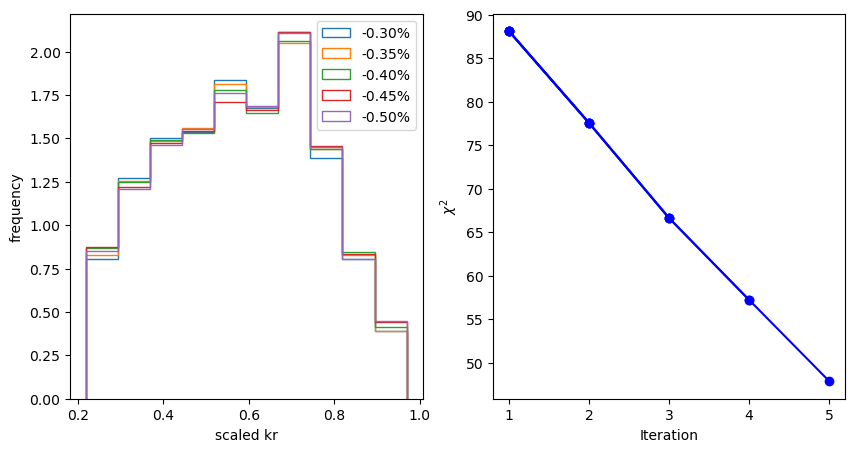

In [10]:
patient_id = 'BrMET019'
region_number = 1
filename = f"{root_dir}/data/glioblastoma_data/PANPEP/{patient_id}/{patient_id}_region{region_number}.csv"
df = pd.read_csv(filename, sep=',')
df = df[df['counts']>=1]
ones_df = df[df['counts'] == 1]
rest_df = df[df['counts'] != 1]

x2s = []
chi_squares = []
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1, ax2 = axes
for i, j in tqdm.tqdm(enumerate(np.arange(30, 55, 5)/100)):
    n_to_remove = int(ones_df.shape[0]*j)
    # print(ones_df.shape[0])
    # print(n_to_remove)

    # Randomly select rows to keep
    ones_df_kept = ones_df.sample(n=ones_df.shape[0] - n_to_remove, random_state=42)

    # Combine back with the rest of the data
    df = pd.concat([rest_df, ones_df_kept])
    # print(df.shape)
    final_clone_count_values = df['counts'].values
    initial_clone_size = 1
    initial_clone_count_values = np.full(len(final_clone_count_values), initial_clone_size)
    scaled_kr_values = df['kr'].values/max_kr_panpep
    x1 = 10
    verbose = False
    _, x2, _, _ = run_optimization_for_fixed_x1(initial_clone_count_values=initial_clone_count_values,
                                                final_clone_count_values=final_clone_count_values, 
                                                scaled_kr_values=scaled_kr_values,
                                                fixed_x1=x1,
                                                verbose=verbose)
    x2s.append(x2)
    probabilities = calc_probs_for_every_tcr(kr=scaled_kr_values, x1=x1, x2=x2, m=initial_clone_size, maxM=10000)
    model_config = generate_configuration_per_tcr(probabilities, min_clone_size=initial_clone_size, max_clone_size=probabilities.shape[1]+initial_clone_size, sample_size=5000)
    min_clone_size_to_consider = 1
    max_clone_size_to_consider = 10
    f_obs = count_clone_sizes(final_clone_count_values, min_size=min_clone_size_to_consider, max_size=max_clone_size_to_consider)
    f_exp = np.mean(np.array([count_clone_sizes(model_config[:, j], min_size=min_clone_size_to_consider, max_size=max_clone_size_to_consider) for j in range(model_config.shape[1])]), axis=0)
    chi2_stat = np.sum([(obs-exp)**2/exp for obs, exp in zip(f_obs, f_exp)])
    chi_squares.append(chi2_stat)
    dof = len(f_obs) -1
    p_value = 1 - chi2.cdf(chi2_stat, dof)
    if p_value <= 0.05:
        print(f'{p_value:.3f} rejects NULL. No good fit.')
    else:
        print(f'{p_value:.3f} accepts NULL. Good fit.')
    
    ax1.hist(scaled_kr_values, bins=10, histtype='step', label=f'-{j:.2f}%', density=True)
    ax1.set_xlabel('scaled kr')
    ax1.set_ylabel('frequency')
    ax1.legend(loc='best')
    
    ax2.plot(range(1, len(chi_squares)+1), chi_squares, '-o', color='blue')
    ax2.set_xlabel(f'Iteration')
    ax2.set_ylabel(r'$\chi^2$')
plt.show()

Processing TCRs: 100%|██████████| 826/826 [00:31<00:00, 26.51it/s]
1it [00:38, 38.27s/it]

0.000 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 759/759 [00:29<00:00, 25.38it/s]
2it [01:14, 37.34s/it]

0.000 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 692/692 [00:28<00:00, 24.66it/s]
3it [01:49, 35.97s/it]

0.001 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 625/625 [00:26<00:00, 23.52it/s]
4it [02:22, 34.89s/it]

0.002 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 558/558 [00:25<00:00, 22.21it/s]
5it [02:53, 33.60s/it]

0.001 rejects NULL. No good fit.


Processing TCRs: 100%|██████████| 491/491 [00:24<00:00, 20.45it/s]
6it [03:24, 34.00s/it]

0.000 rejects NULL. No good fit.


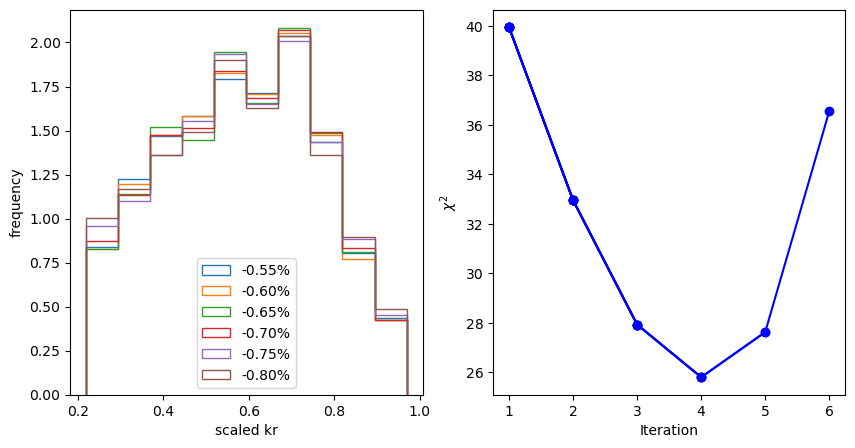

In [11]:
patient_id = 'BrMET019'
region_number = 1
filename = f"{root_dir}/data/glioblastoma_data/PANPEP/{patient_id}/{patient_id}_region{region_number}.csv"
df = pd.read_csv(filename, sep=',')
df = df[df['counts']>=1]
ones_df = df[df['counts'] == 1]
rest_df = df[df['counts'] != 1]

x2s = []
chi_squares = []
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1, ax2 = axes
for i, j in tqdm.tqdm(enumerate(np.arange(55, 85, 5)/100)):
    n_to_remove = int(ones_df.shape[0]*j)
    # print(ones_df.shape[0])
    # print(n_to_remove)

    # Randomly select rows to keep
    ones_df_kept = ones_df.sample(n=ones_df.shape[0] - n_to_remove, random_state=42)

    # Combine back with the rest of the data
    df = pd.concat([rest_df, ones_df_kept])
    # print(df.shape)
    final_clone_count_values = df['counts'].values
    initial_clone_size = 1
    initial_clone_count_values = np.full(len(final_clone_count_values), initial_clone_size)
    scaled_kr_values = df['kr'].values/max_kr_panpep
    x1 = 10
    verbose = False
    _, x2, _, _ = run_optimization_for_fixed_x1(initial_clone_count_values=initial_clone_count_values,
                                                final_clone_count_values=final_clone_count_values, 
                                                scaled_kr_values=scaled_kr_values,
                                                fixed_x1=x1,
                                                verbose=verbose)
    x2s.append(x2)
    probabilities = calc_probs_for_every_tcr(kr=scaled_kr_values, x1=x1, x2=x2, m=initial_clone_size, maxM=10000)
    model_config = generate_configuration_per_tcr(probabilities, min_clone_size=initial_clone_size, max_clone_size=probabilities.shape[1]+initial_clone_size, sample_size=5000)
    min_clone_size_to_consider = 1
    max_clone_size_to_consider = 10
    f_obs = count_clone_sizes(final_clone_count_values, min_size=min_clone_size_to_consider, max_size=max_clone_size_to_consider)
    f_exp = np.mean(np.array([count_clone_sizes(model_config[:, j], min_size=min_clone_size_to_consider, max_size=max_clone_size_to_consider) for j in range(model_config.shape[1])]), axis=0)
    chi2_stat = np.sum([(obs-exp)**2/exp for obs, exp in zip(f_obs, f_exp)])
    chi_squares.append(chi2_stat)
    dof = len(f_obs) -1
    p_value = 1 - chi2.cdf(chi2_stat, dof)
    if p_value <= 0.05:
        print(f'{p_value:.3f} rejects NULL. No good fit.')
    else:
        print(f'{p_value:.3f} accepts NULL. Good fit.')
    
    ax1.hist(scaled_kr_values, bins=10, histtype='step', label=f'-{j:.2f}%', density=True)
    ax1.set_xlabel('scaled kr')
    ax1.set_ylabel('frequency')
    ax1.legend(loc='best')
    
    ax2.plot(range(1, len(chi_squares)+1), chi_squares, '-o', color='blue')
    ax2.set_xlabel(f'Iteration')
    ax2.set_ylabel(r'$\chi^2$')
plt.show()

In [72]:
probabilities = calc_probs_for_every_tcr(kr=scaled_kr_values, x1=x1, x2=x2, m=10, maxM=10000)

Processing TCRs: 100%|██████████| 326/326 [00:31<00:00, 10.26it/s]


In [73]:
model_config = generate_configuration_per_tcr(probabilities, min_clone_size=10, max_clone_size=probabilities.shape[1]+10, sample_size=5000)

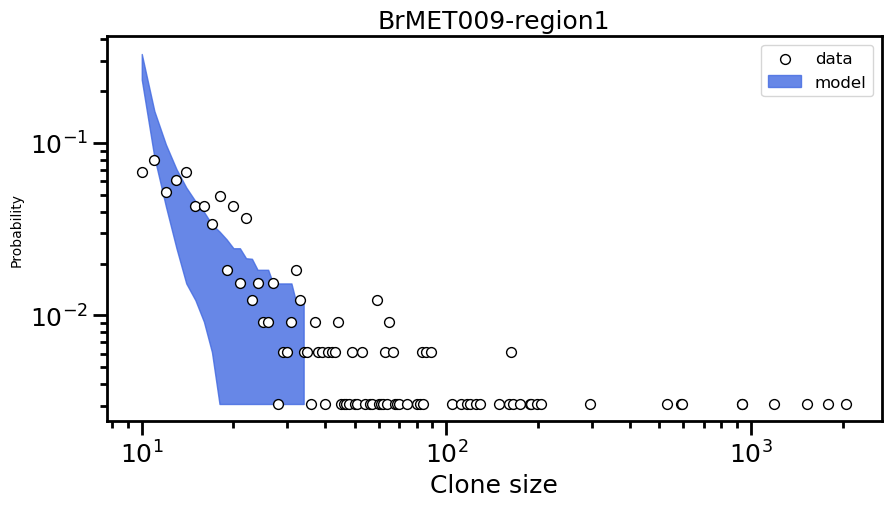

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
data_config = final_clone_count_values.copy()
data_config = np.unique(data_config, return_counts=True)
x_data, y_data = data_config[0], data_config[1] / np.sum(data_config[1])

least_number_of_observations = 10
ci_df = ci_pdf(model_config, alpha=5, least_number_of_observations=least_number_of_observations)
ci_df = ci_df[(ci_df['lower']!=ci_df['median']) &  (ci_df['median']!=ci_df['upper'])]

facecolors = 'white'#'royalblue' if 'BrMET' in patient_id else 'red'
edgecolors = 'black'#darkblue' if 'BrMET' in patient_id else 'darkred'
ax.scatter(x_data, y_data, s=50, facecolors=facecolors, alpha=1.0, edgecolors=edgecolors, zorder=2, label='data')
# for i in range(model_config.shape[1]):
#     # if i == 100:
#     #     break
#     ax.plot(pdf(model_config[:, i])[0], pdf(model_config[:, i])[1], color='red', alpha=0.1)
ax.fill_between(ci_df['clone_size'], ci_df['lower'], ci_df['upper'], color='royalblue' if 'BrMET' in patient_id else 'red', zorder=1, alpha=0.8, label=f'model')

ax.set_xscale('log')
ax.set_yscale('log')
offset_x = 0.30

# ax.set_xlim(min(x_data) - offset_x * min(x_data), max(x_data) + offset_x * max(x_data))
# ax.set_ylim(min(y_data) - offset_y * min(y_data), max(y_data) + offset_y * max(y_data))

ax.set_xlabel(r"Clone size", fontsize=18)
ax.set_ylabel('Probability')
for label in ax.get_xticklabels():
    label.set_fontsize(18)
for label in ax.get_yticklabels():
    label.set_fontsize(18)
ax.tick_params(
axis="x", which="major", direction="out", length=10, width=2, labelsize=18
)
ax.tick_params(
axis="x", which="minor", direction="out", length=5, width=2, labelsize=18
)
ax.tick_params(
axis="y", which="major", direction="out", length=10, width=2, labelsize=18
)
ax.tick_params(
axis="y", which="minor", direction="out", length=5, width=2, labelsize=18
)

for spine in ax.spines.values():
    spine.set_linewidth(2)

ax.legend(loc='upper right', fontsize=12)
ax.set_title(f'{patient_id}-region{region_number}', fontsize=18)
plt.show()

In [75]:
min_clone_size_to_consider = 10
max_clone_size_to_consider = 100
f_obs = count_clone_sizes(final_clone_count_values, min_size=min_clone_size_to_consider, max_size=max_clone_size_to_consider)
f_exp = np.mean(np.array([count_clone_sizes(model_config[:, j], min_size=min_clone_size_to_consider, max_size=max_clone_size_to_consider) for j in range(model_config.shape[1])]), axis=0)
chi2_stat = np.sum([(obs-exp)**2/exp for obs, exp in zip(f_obs, f_exp)])
dof = len(f_obs) -1
p_value = 1 - chi2.cdf(chi2_stat, dof)
print(p_value)
print(get_asterisks(p_value))

0.0
∗∗∗


In [76]:
data_points = pdf(final_clone_count_values)
count_within_band = 0
for x, y in zip(data_points[0], data_points[1]):
    look_at = ci_df[ci_df['clone_size']==x]
    if look_at.empty:
        continue
    lower_bound = look_at['lower'].values[0]
    upper_bound = look_at['upper'].values[0]
    if (lower_bound<=y) & (y<=upper_bound):
        count_within_band += 1
coverage_probability = count_within_band/np.sum(data_points[0]<=ci_df['clone_size'].max())
print(f'{patient_id}-region{region_number}: {coverage_probability*100:.0f}%')

BrMET009-region1: 68%


## LATEST DEVELOPMENT:

In [16]:
import tqdm

In [51]:
coverages = []
prob_data = []
prob_model = []
prob_of2to9_per_config_all_patient = []
for patient_id in patient_names[:1]:
    region_number_logic = range(1, 4) if patient_id not in ['BrMET008', 'GBM032'] else range(1, 5)
    for region_number in region_number_logic[:1]:
        # print(patient_id, region_number)
        try:
            with h5py.File(f'/home/gddaslab/mxp140/tcr_project_ultimate/results/{patient_id}_region{region_number}_model_results_from_panpep.h5', 'r') as f:
                data_config = f['data_config'][:]
                # model_config = f['model_config'][:]
                model_probs = f['probabilities'][:]
            data_points = pdf(data_config)
            prob_data.append(np.sum(data_points[1][1:10]))
            model_config = np.zeros((model_probs.shape[0], data_config.sum()))
            for row in tqdm.tqdm(range(model_probs.shape[0])):
                model_config[row] = np.random.choice(range(1, model_probs.shape[1]+1), size=data_config.sum(), replace=True, p=model_probs[row, :])
            # prob_model.append(np.sum(pdf(np.concatenate(model_config))[1][1:10]))
            # prob_of2to9_per_config = []
            # for col in tqdm.tqdm(range(model_config.shape[1])):
            #     pdf_data = pdf(model_config[:, col])
            #     prob_of2to9_per_config.append(pdf_data[1][1:10].sum())
            # prob_of2to9_per_config_all_patient.append(prob_of2to9_per_config)             
            # ci_df = ci_pdf(model_config, alpha=5, least_number_of_observations=10)
            # ci_df = ci_df[(ci_df['lower']!=ci_df['median']) &  (ci_df['median']!=ci_df['upper'])]
            # count_within_band = 0
            # for x, y in zip(data_points[0], data_points[1]):
            #     look_at = ci_df[ci_df['clone_size']==x]
            #     if look_at.empty:
            #         # print(f'clone {x} not found in {patient_id}-region{region_number}')
            #         continue
            #     lower_bound = look_at['lower'].values[0]
            #     upper_bound = look_at['upper'].values[0]
            #     if (lower_bound<=y) & (y<=upper_bound):
            #         count_within_band += 1
            # coverage_probability = count_within_band/np.sum(data_points[0]<=ci_df['clone_size'].max())
            # print(f'{patient_id}-region{region_number}: {coverage_probability*100:.0f}%')
            # coverages.append(coverage_probability)
        except:
            # print(f"File not found for {patient_id}-region{region_number}")
            continue
# print(f'Mean coverage per data: {np.mean(coverages)}')

100%|██████████| 654/654 [00:00<00:00, 733.28it/s]


In [8]:
model_probs[0, :].sum()

np.float32(1.0)

In [56]:
data_config.shape

(654,)

In [57]:
model_config.shape

(654, 1227)

In [54]:
model_config[:, 0]

array([ 1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,
        2.,  4.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,
        2.,  1.,  1.,  1.,  8.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
        1.,  2.,  1.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  1.,  4.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,
        1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,
        2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        2.,  1.,  3.,  1.,  6.,  4.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  1.,  1.,  2.,  1.,  6.,  1.,  1.,  1.,  1.,  2.,
        1.,  1.,  2.,  1.,  1.,  1.,  5.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  5.,  1.,  1.,  2.,  3.,  5.,  1.,  2.,  1.,  1.,  1.,  3.,
        2.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  1.,  1.,  6.,  1.,  1.,
        1.,  1.,  5.,  1.,  1.,  5.,  1.,  2.,  3.,  1.,  1.,  1

In [ ]:
pdf(model_config[:, 0][:100])

In [ ]:
pdf()

In [42]:
import numpy as np
import random

def fast_sample_sum_geq_N(probabilities, N, min_clone_size=1):
    clone_sizes = np.arange(min_clone_size, len(probabilities) + min_clone_size)

    # Initial sample
    for _ in range(100):
        sample = np.random.choice(clone_sizes, size=size, replace=True, p=probabilities)
    
    # if total >= N:
    #     return np.sum(sample)
    # else:
    #     return 0
            
    # for val in sample:
    #     result.append(val)
    #     total += val
    #     if total >= N:
    #         break

    # if total == N:
    #     return result

    # # Reduce if sum > N
    # while total > N:
    #     i = random.randrange(len(result))
    #     total -= result[i]
    #     del result[i]

In [47]:
a = fast_sample_sum_geq_N(model_probs[0, :], data_config.sum())
print(a)

8438


In [41]:
data_config.sum()

np.int64(35370)

In [14]:
data_config.sum()

np.int64(1227)

In [13]:
a.sum()

np.int64(1289)

In [80]:
import numpy as np
import random

def fast_sample_sum_geq_N(probabilities, target_sample_count=1000, min_clone_size=1, number_of_configs = 1000):
    clone_sizes = np.arange(min_clone_size, len(probabilities) + min_clone_size)
    
    final_samples = []
    for _ in range(number_of_configs):
        samples_per_config = []
        total = 0
        while total <= target_sample_count:
            sample = np.random.choice(clone_sizes, size=1000, replace=True, p=probabilities)
            samples_per_config.extend(sample)
            total += np.sum(samples_per_config)

        if total == target_sample_count:
            final_samples.append(samples_per_config)
        
        # Reduce if sum > N
        while total > target_sample_count:
            i = random.randrange(len(samples_per_config))
            total -= samples_per_config[i]
            del samples_per_config[i]
        final_samples.append(samples_per_config)

    return final_samples

In [158]:
a = fast_sample_sum_geq_N(model_probs[0, :], target_sample_count=data_config.sum(), min_clone_size=1, number_of_configs = 1000)

KeyboardInterrupt: 

In [156]:
for i in range(len(a)):
    if np.sum(a[i]) != data_config.sum():
        print(f'{i}, Violated')

5, Violated
10, Violated
11, Violated
15, Violated
24, Violated
29, Violated
36, Violated
37, Violated
40, Violated
42, Violated
43, Violated
44, Violated
48, Violated
49, Violated
57, Violated
61, Violated
65, Violated
77, Violated
78, Violated
83, Violated
86, Violated
88, Violated
97, Violated
98, Violated
102, Violated
107, Violated
114, Violated
115, Violated
124, Violated
125, Violated
132, Violated
133, Violated
134, Violated
146, Violated
148, Violated
160, Violated
164, Violated
169, Violated
172, Violated
177, Violated
179, Violated
182, Violated
185, Violated
191, Violated
202, Violated
204, Violated
206, Violated
208, Violated
209, Violated
213, Violated
222, Violated
230, Violated
235, Violated
241, Violated
244, Violated
253, Violated
256, Violated
258, Violated
265, Violated
267, Violated
271, Violated
276, Violated
285, Violated
288, Violated
289, Violated
297, Violated
302, Violated
303, Violated
306, Violated
307, Violated
308, Violated
309, Violated
316, Violated
321

In [151]:
np.sum(a[2])

np.int64(1229)

In [138]:
np.sum(np.random.choice(range(1, model_probs.shape[1]+1), size=data_config.sum(), replace=True, p=model_probs[0, :]))

np.int64(1556)

In [58]:
truth_array = []
for i in range(len(prob_data))[:]:
    a = np.percentile(prob_of2to9_per_config_all_patient[i], 2.5)
    b = np.percentile(prob_of2to9_per_config_all_patient[i], 97.5)
    c = prob_data[i]
    truth_array.append(a<=c<=b)

In [60]:
np.sum(truth_array)

np.int64(15)

In [61]:
(15/55)*100

27.27272727272727

In [39]:
np.percentile(prob_of2to9_per_config, 2.5)

np.float64(0.2415902140672783)

In [40]:
np.percentile(prob_of2to9_per_config, 97.5)

np.float64(0.3073394495412844)

In [18]:
np.std(prob_data)

np.float64(0.04633042805780195)

In [19]:
np.mean(prob_model)

np.float64(0.21874263050072232)

In [20]:
np.std(prob_model)

np.float64(0.058816516912213124)

In [24]:
np.percentile(prob_model, 2.5)

np.float64(0.10921720430107527)

In [26]:
np.percentile(prob_model, 97.5)

np.float64(0.3087819127701406)

In [23]:
len(prob_model)

55

In [ ]:
all_configs = np.empty((prob_array.shape[0], sample_size))
for i in tqdm.tqdm(
    range(prob_array.shape[0]),
    total=prob_array.shape[0],
    desc="Generating configuration for each TCR",
    leave=False,
    disable=disable_progressbar,
):
    # config_per_tcr = generate_configuration_per_tcr(prob_array[i, :], size)
    config_per_tcr = np.random.choice(
        range(min_clone_size, prob_array.shape[1] + min_clone_size),
        size=sample_size,
        replace=True,
        p=prob_array[i, :] / sum(prob_array[i, :]),
    )
    all_configs[i, :] = config_per_tcr

In [ ]:
np.random.choice(
        range(min_clone_size, prob_array.shape[1] + min_clone_size),
        size=sample_size,
        replace=True,
        p=prob_array[i, :] / sum(prob_array[i, :]),
    )

In [37]:
p_value_df = pd.DataFrame(columns=['patient', 'type', 'p_value'])
chi_squared_values = []
coverages = []
for patient_id in patient_names[:]:
    region_number_logic = range(1, 4) if patient_id not in ['BrMET008', 'GBM032'] else range(1, 5)
    for region_number in region_number_logic[:]:
        # print(patient_id, region_number)
        try:
            with h5py.File(f'/home/gddaslab/mxp140/tcr_project_ultimate/results/{patient_id}_region{region_number}_model_results_from_panpep.h5', 'r') as f:
                data_config = f['data_config'][:]
                model_config = f['model_config'][:]
            data_points = pdf(data_config)
            ci_df = ci_pdf(model_config, alpha=5, least_number_of_observations=10)
            ci_df = ci_df[(ci_df['lower']!=ci_df['median']) &  (ci_df['median']!=ci_df['upper'])]
            count_within_band = 0
            for x, y in zip(data_points[0], data_points[1]):
                if (x!=1) and (x<10):
                    # print(x)
                    look_at = ci_df[ci_df['clone_size']==x]
                    if look_at.empty:
                        # print(f'clone {x} not found in {patient_id}-region{region_number}')
                        continue
                    lower_bound = look_at['lower'].values[0]
                    upper_bound = look_at['upper'].values[0]
                    if (lower_bound<=y) & (y<=upper_bound):
                        count_within_band += 1
                else:
                    # print(f'{x} not considered.')
                    continue
                    
            coverage_probability = count_within_band/np.sum((data_points[0]<=ci_df['clone_size'].max()) & (data_points[0]!=1))
            print(f'{patient_id}-region{region_number}: {coverage_probability*100:.0f}%')
            coverages.append(coverage_probability)
        except:
            # print(f"File not found for {patient_id}-region{region_number}")
            continue
print(f'Mean coverage per data: {np.mean(coverages)}')

BrMET008-region1: 89%
BrMET008-region2: 100%
BrMET008-region3: 100%
BrMET008-region4: 100%
BrMET009-region1: 3%
BrMET009-region2: 6%
BrMET009-region3: 6%
BrMET010-region1: 45%
BrMET010-region2: 30%
BrMET010-region3: 50%
BrMET018-region1: 9%
BrMET018-region2: 100%
BrMET018-region3: 31%
BrMET019-region1: 40%
BrMET019-region2: 24%
BrMET019-region3: 67%
BrMET025-region1: 50%
BrMET025-region2: 67%
BrMET025-region3: 75%
BrMET027-region1: 12%
BrMET027-region2: 31%
BrMET027-region3: 21%
BrMET028-region1: 100%
BrMET028-region2: 80%
BrMET028-region3: 100%
GBM032-region1: 21%
GBM032-region2: 62%
GBM032-region3: 71%
GBM032-region4: 19%
GBM052-region1: 75%
GBM052-region2: 30%
GBM052-region3: 12%
GBM055-region2: 44%
GBM056-region1: 83%
GBM056-region2: 44%
GBM056-region3: 71%
GBM059-region1: 71%
GBM059-region2: 16%
GBM059-region3: 38%
GBM062-region1: 100%
GBM062-region2: 100%
GBM062-region3: 100%
GBM063-region1: 80%
GBM063-region3: 75%
GBM064-region2: 67%
GBM064-region3: 80%
GBM070-region1: 80%
GBM07

In [32]:
b = data_points[1][1:11].sum()
b

np.float64(0.21360671015843433)

In [26]:
a = [pdf(model_config[:, col])[1][1:11].sum() for col in range(model_config.shape[1])]

In [29]:
a = np.sort(a)

In [33]:
np.min(a)<=b<=np.max(a)

np.False_